# Food Delivery Time Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import (accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score, 
                            roc_curve, auc, roc_auc_score )

# Phase 1: Data Preprocessing

## Data Import and Cleaning:

### 1. Load the dataset (Food_Delivery_Time_Prediction.csv)

In [2]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


### 2. Handle missing values through imputation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

### 3. Encode categorical features (e.g., weather, traffic, and vehicle type) using LabelEncoder

In [4]:
encoding_columns = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=encoding_columns, drop_first=False)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Delivery_Person_Experience  200 non-null    int64  
 5   Order_Priority              200 non-null    object 
 6   Order_Time                  200 non-null    object 
 7   Restaurant_Rating           200 non-null    float64
 8   Customer_Rating             200 non-null    float64
 9   Delivery_Time               200 non-null    float64
 10  Order_Cost                  200 non-null    float64
 11  Tip_Amount                  200 non-null    float64
 12  Weather_Conditions_Cloudy   200 non-null    bool   
 13  Weather_Conditions_Rainy    200 non

### 4. Normalize continuous features such as distance and delivery time.

In [5]:
scaler = StandardScaler()
df_scaled = df_encoded.copy(deep=True)
columns = df_scaled.select_dtypes(include=[int, float]).columns
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
df_scaled.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,-0.456512,Medium,Afternoon,0.515500,-0.987317,-1.487932,...,False,True,False,False,False,False,True,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,1.004325,Low,Night,1.085900,0.738511,-0.264987,...,True,False,False,False,False,False,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,1.369535,High,Night,-0.625302,-0.412041,-0.741529,...,False,False,True,False,False,False,True,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,-1.186930,Medium,Evening,-0.767902,0.019416,1.382411,...,True,False,False,False,False,True,False,False,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,0.273907,Low,Night,-0.340101,-1.274955,-1.280915,...,False,True,False,False,True,False,False,False,True,False


## Feature Engineering:

### 1. Calculate the geographic distance between the customer and restaurant using latitude and longitude (Haversine formula).

In [6]:
# Making latitute and logitute as list
def extract_lat_log(location_str):
    location_val = location_str.strip("()")
    lat, log = location_val.split(",")
    location_arr = [float(lat), float(log)]
    return location_arr

df_scaled['Customer_Location'] = df_scaled['Customer_Location'].apply(extract_lat_log)
df_scaled['Restaurant_Location'] = df_scaled['Restaurant_Location'].apply(extract_lat_log)

# Calculating the distance between coordinates
def haversine (cust_loc, rest_loc):
    distance = []

    # Seperating Customer and Restaurant latitute and Longitute
    for index in range(0,len(cust_loc)):
        lat1 = cust_loc[index][0]
        lat2 = rest_loc[index][0]

        log1 = cust_loc[index][1]
        log2 = rest_loc[index][1]
        
        R = 6371
        lat1, log1, lat2, log2 = map(radians, [lat1, log1, lat2, log2])
        dlat = lat2 - lat1
        dlog = log2 - log1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlog/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        
        distance.append(round(R*c, 2))

    df_scaled['Distance in Km'] = distance

df_scaled.apply(lambda row: haversine(df_scaled['Customer_Location'], df_scaled['Restaurant_Location']), axis=1)

df_scaled.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Distance in Km
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",-1.454738,-0.456512,Medium,Afternoon,0.515500,-0.987317,-1.487932,...,True,False,False,False,False,True,False,False,True,775.65
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",1.439192,1.004325,Low,Night,1.085900,0.738511,-0.264987,...,False,False,False,False,False,True,False,False,True,1042.39
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",-0.666417,1.369535,High,Night,-0.625302,-0.412041,-0.741529,...,False,True,False,False,False,True,False,True,False,476.22
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",0.335835,-1.186930,Medium,Evening,-0.767902,0.019416,1.382411,...,False,False,False,False,True,False,False,True,False,389.91
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",-0.700119,0.273907,Low,Night,-0.340101,-1.274955,-1.280915,...,True,False,False,True,False,False,False,True,False,806.51


### 2. Create binary categories based on delivery time (e.g., 1 for delayed and 0 for fast)

In [7]:
def delivery_status(time):
    if time < df_scaled['Delivery_Time'].quantile(2/4):
        return 0
    else:
        return 1

df_scaled['Delivery_Status'] = df_scaled['Delivery_Time'].apply(delivery_status)

# Phase 2: Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree

#### Selecting columns with continuous values

In [8]:
continuous_columns = df_scaled.select_dtypes(include=[int, float]).columns

#### 1. Splitting dataset into data and target sets 
#### 2. Splitting data and target set into training and testing set with 20% testing set length (USING THIS TRAINING AND TESTING SETS IN ALL THE MODELS)

In [9]:
X = df_scaled[continuous_columns[:-1]].values
Y = df_scaled['Delivery_Status'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Naive Bayes Classifier:

In [10]:
# Apply the Gaussian Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
cf_nb = confusion_matrix(y_test, y_pred_nb)

# Evaluation Metrics
print(f"Accuracy Score : {round(accuracy_score(y_test, y_pred_nb)*100, 2)}%")
print(f"Precision Score : {round(precision_score(y_test, y_pred_nb)*100, 2)}%")
print(f"Recall Score : {round(recall_score(y_test, y_pred_nb)*100, 2)}%")
print(f"F1 Score : {round(f1_score(y_test, y_pred_nb)*100, 2)}%")
print(f"Confusion Metrix : \n{cf_nb}")

Accuracy Score : 97.5%
Precision Score : 100.0%
Recall Score : 95.65%
F1 Score : 97.78%
Confusion Metrix : 
[[17  0]
 [ 1 22]]


## K-Nearest Neighbors (KNN):

### 1. Hyperparameter Tuning:

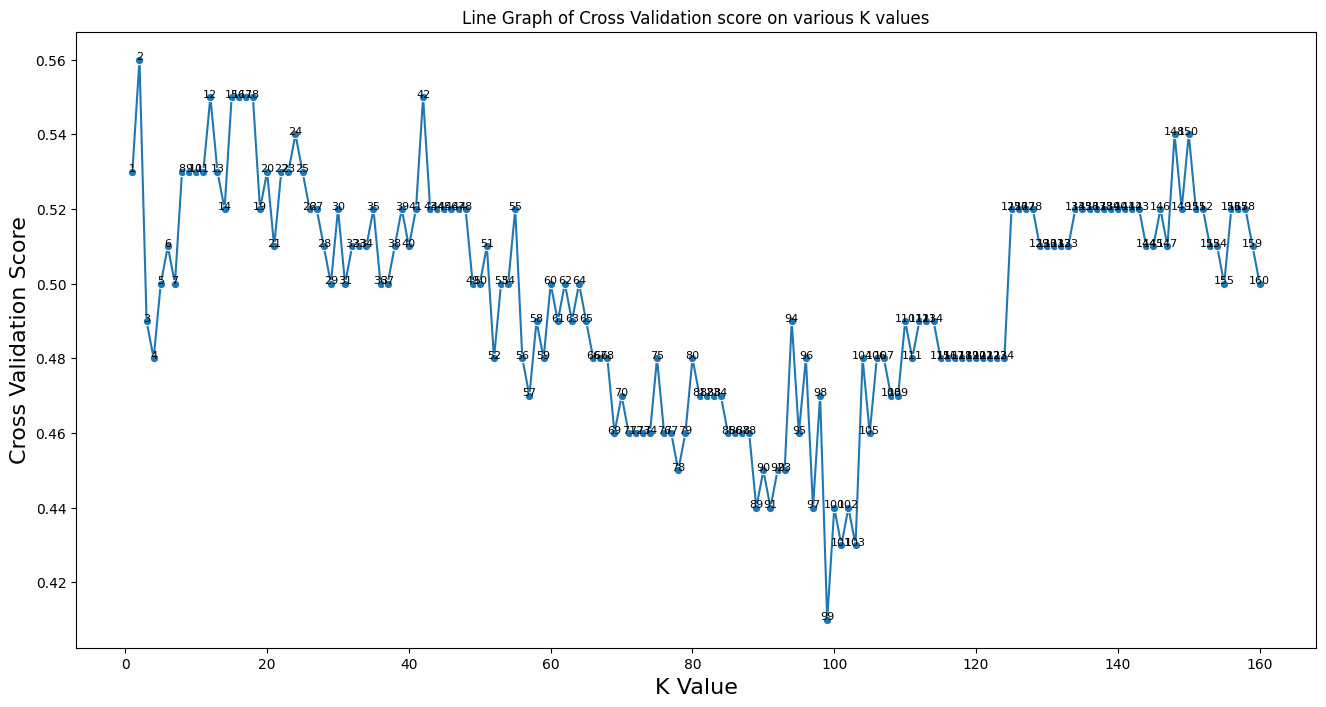

In [11]:
k_list = list(range(1, len(x_train)+1))
scores = []
for k in k_list:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model_knn, X, Y, cv = 5)
    scores.append(round(score.mean(), 2))

score_df = pd.DataFrame({
    'k': k_list,
    'score': scores
})

plt.figure(figsize = (16,8))
sns.lineplot(score_df, x = 'k', y = 'score', marker = 'o')

for i in range(len(score_df)):
    x = score_df['k'][i]
    y = score_df['score'][i]

    plt.text(x, y, f"{x}", ha='center', fontsize=8)

plt.title("Line Graph of Cross Validation score on various K values")
plt.xlabel('K Value', fontsize=16)
plt.ylabel('Cross Validation Score', fontsize=16)
plt.savefig("Line Graph of Cross Validation score on various K values")
plt.show()

### 2. Use the KNN classifier and Evaluation Metrics

In [12]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
cf_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy Score : {round(accuracy_score(y_test, y_pred_knn)*100, 2)}%")
print(f"Precision Score : {round(precision_score(y_test, y_pred_knn)*100, 2)}%")
print(f"Recall Score : {round(recall_score(y_test, y_pred_knn)*100, 2)}%")
print(f"F1 Score : {round(f1_score(y_test, y_pred_knn)*100, 2)}%")
print(f"Confusion Matrix: \n {cf_knn}")

Accuracy Score : 42.5%
Precision Score : 50.0%
Recall Score : 8.7%
F1 Score : 14.81%
Confusion Matrix: 
 [[15  2]
 [21  2]]


### Decision Tree:

In [13]:
model_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
model_decision_tree.fit(x_train, y_train)
y_pred_dt = model_decision_tree.predict(x_test)
cf_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy Score : {round(accuracy_score(y_test, y_pred_dt)*100, 2)}%")
print(f"Precision Score : {round(precision_score(y_test, y_pred_dt)*100, 2)}%")
print(f"Recall Score : {round(recall_score(y_test, y_pred_dt)*100, 2)}%")
print(f"F1 Score : {round(f1_score(y_test, y_pred_dt)*100, 2)}%")
print(f"Confusion Matrix: \n {cf_dt}")

Accuracy Score : 100.0%
Precision Score : 100.0%
Recall Score : 100.0%
F1 Score : 100.0%
Confusion Matrix: 
 [[17  0]
 [ 0 23]]


# Phase 3: Reporting and Insights

## Model Comparison:

#### Compare the performance of Naive Bayes, KNN, and Decision Tree classifiers

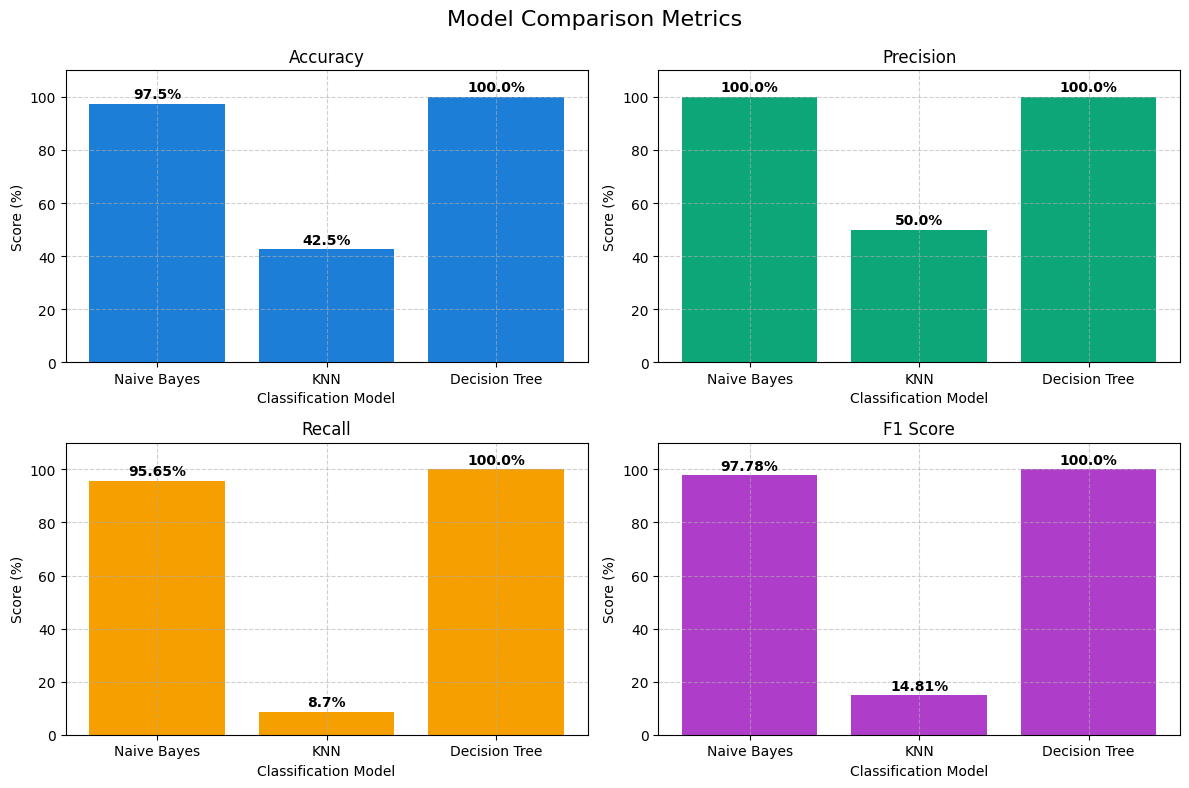

In [14]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Naive Bayes', 'KNN', 'Decision Tree']
accuracy = [round(accuracy_score(y_test, y_pred_nb)*100, 2), 
            round(accuracy_score(y_test, y_pred_knn)*100, 2), 
            round(accuracy_score(y_test, y_pred_dt)*100, 2)
]
precision = [round(precision_score(y_test, y_pred_nb)*100, 2), 
             round(precision_score(y_test, y_pred_knn)*100, 2), 
             round(precision_score(y_test, y_pred_dt)*100, 2)
]
recall = [round(recall_score(y_test, y_pred_nb)*100, 2), 
          round(recall_score(y_test, y_pred_knn)*100, 2), 
          round(recall_score(y_test, y_pred_dt)*100, 2)
]
f1 = [round(f1_score(y_test, y_pred_nb)*100, 2), 
            round(f1_score(y_test, y_pred_knn)*100, 2), 
            round(f1_score(y_test, y_pred_dt)*100, 2)
]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Function to add annotations
def annotate_bars(ax, values):
    for i, val in enumerate(values):
        ax.text(i, val + 1, f'{val}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Accuracy
axs[0, 0].bar(models, accuracy, color='#1c7ed6')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 110)
annotate_bars(axs[0, 0], accuracy)

# Precision
axs[0, 1].bar(models, precision, color='#0ca678')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 110)
annotate_bars(axs[0, 1], precision)

# Recall
axs[1, 0].bar(models, recall, color='#f59f00')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 110)
annotate_bars(axs[1, 0], recall)

# F1 Score
axs[1, 1].bar(models, f1, color='#ae3ec9')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 110)
annotate_bars(axs[1, 1], f1)

# Formatting
for ax in axs.flat:
    ax.set_ylabel('Score (%)')
    ax.set_xlabel('Classification Model')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Model Comparison Metrics', fontsize=16)
plt.savefig('Model Comparison Metrics')
plt.show()

#### 1. Confusion Matrix

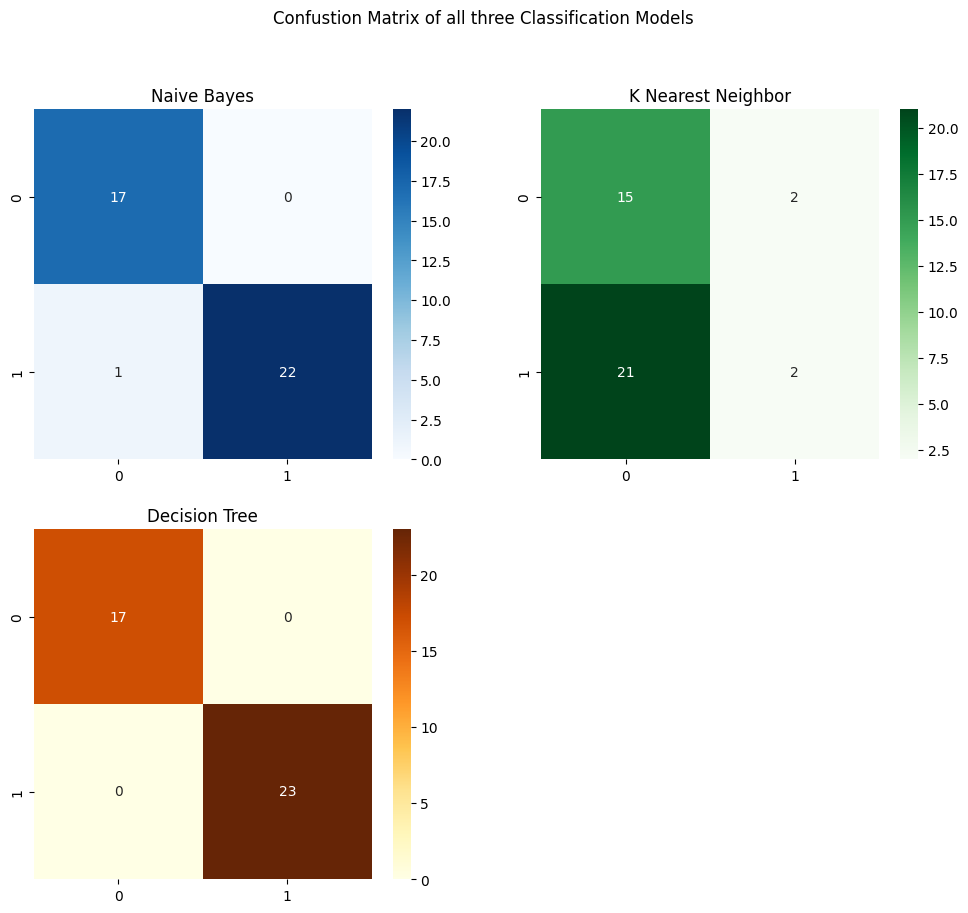

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

ax = ax.ravel()

cfm_plot = {
    'cfm_model' : [cf_nb, cf_knn, cf_dt],
    'cfm_title' : ['Naive Bayes', 'K Nearest Neighbor', 'Decision Tree'],
    'cmap' : ['Blues', 'Greens', 'YlOrBr']
}

for i in range(3):
    sns.heatmap(cfm_plot['cfm_model'][i], annot=True, fmt='d', cmap=cfm_plot['cmap'][i], ax=ax[i])
    ax[i].set_title(cfm_plot['cfm_title'][i])

fig.delaxes(ax[3])

fig.suptitle('Confustion Matrix of all three Classification Models')
plt.savefig('Confustion Matrix of all three Classification Models')
plt.show()

#### 2. ROC curve

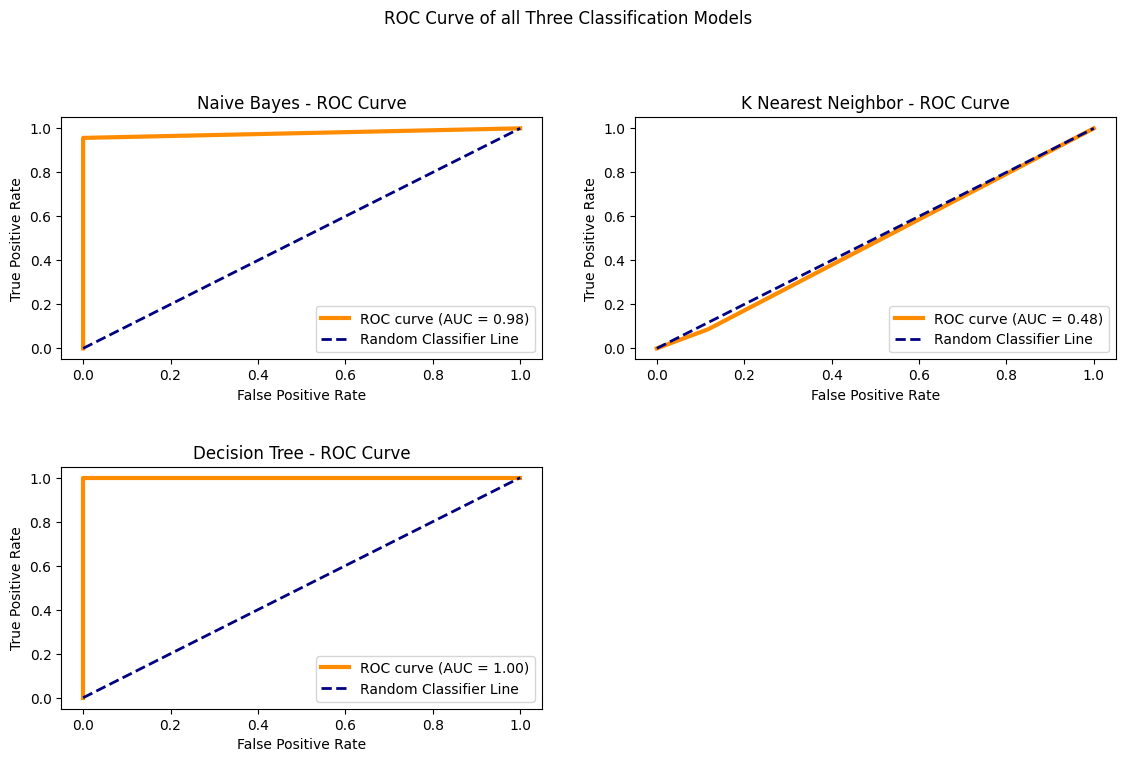

In [16]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
y_pred_list = [y_pred_nb, y_pred_knn, y_pred_dt]
model = ['Naive Bayes', 'K Nearest Neighbor', 'Decision Tree']

ax = ax.ravel()

for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_list[i])
    roc_auc = auc(fpr, tpr)
    
    ax[i].plot(fpr, tpr, color="darkorange", lw=3, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    ax[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier Line')
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title(f"{model[i]} - ROC Curve")
    ax[i].legend(loc="lower right")

fig.suptitle("ROC Curve of all Three Classification Models")
plt.savefig("ROC Curve of all Three Classification Models")
plt.tight_layout(pad=3)
fig.delaxes(ax[3])

## Actionable Insights

### Strengths and Weaknesses of Each Model

**1. Naive Bayes**
- **Strengths**:
  - High accuracy (97.50%) indicates that the model is effective for this classification task.
  - Simple and fast, making it suitable for real-time predictions.
  - Performs well with small datasets and handles categorical inputs effectively.
- **Weaknesses**:
  - Assumes feature independence, which might not always hold true in real-world scenarios.
  - May not perform well with highly correlated features.

**2. K-Nearest Neighbors (KNN)**
- **Strengths**:
  - Simple and intuitive model.
  - Non-parametric and does not make assumptions about data distribution.
- **Weaknesses**:
  - Poor performance in this case (accuracy: 42.50%) suggests the model is not suitable for this dataset.
  - Sensitive to the choice of K and feature scaling.
  - Computationally expensive during prediction.

**3. Decision Tree**
- **Strengths**:
  - High accuracy (100.00%) on par with Naive Bayes.
  - Highly interpretable and easy to visualize, aiding business understanding.
  - Handles both numerical and categorical data well.
- **Weaknesses**:
  - Prone to overfitting, especially with smaller datasets unless pruned.
  - Can be unstable with small changes in data.

### Recommended Classifier

**Decision Tree** is recommended for this task due to:
- **High Accuracy**: Matches Naive Bayes (100.0%), indicating reliable performance.
- **Interpretability**: Offers clear decision rules that are easy to understand and explain to stakeholders.
- **Suitability**: Better at handling feature interactions compared to Naive Bayes.

Thus, while both Naive Bayes and Decision Tree show strong performance, the **Decision Tree** is preferred for its **balance of accuracy and interpretability**, which are crucial for operational decision-making in delivery status prediction.
